In [74]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.applications import VGG16, VGG19, ResNet50V2
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger
import visualkeras
from PIL import ImageFont
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
input_shape = (150, 150, 3)

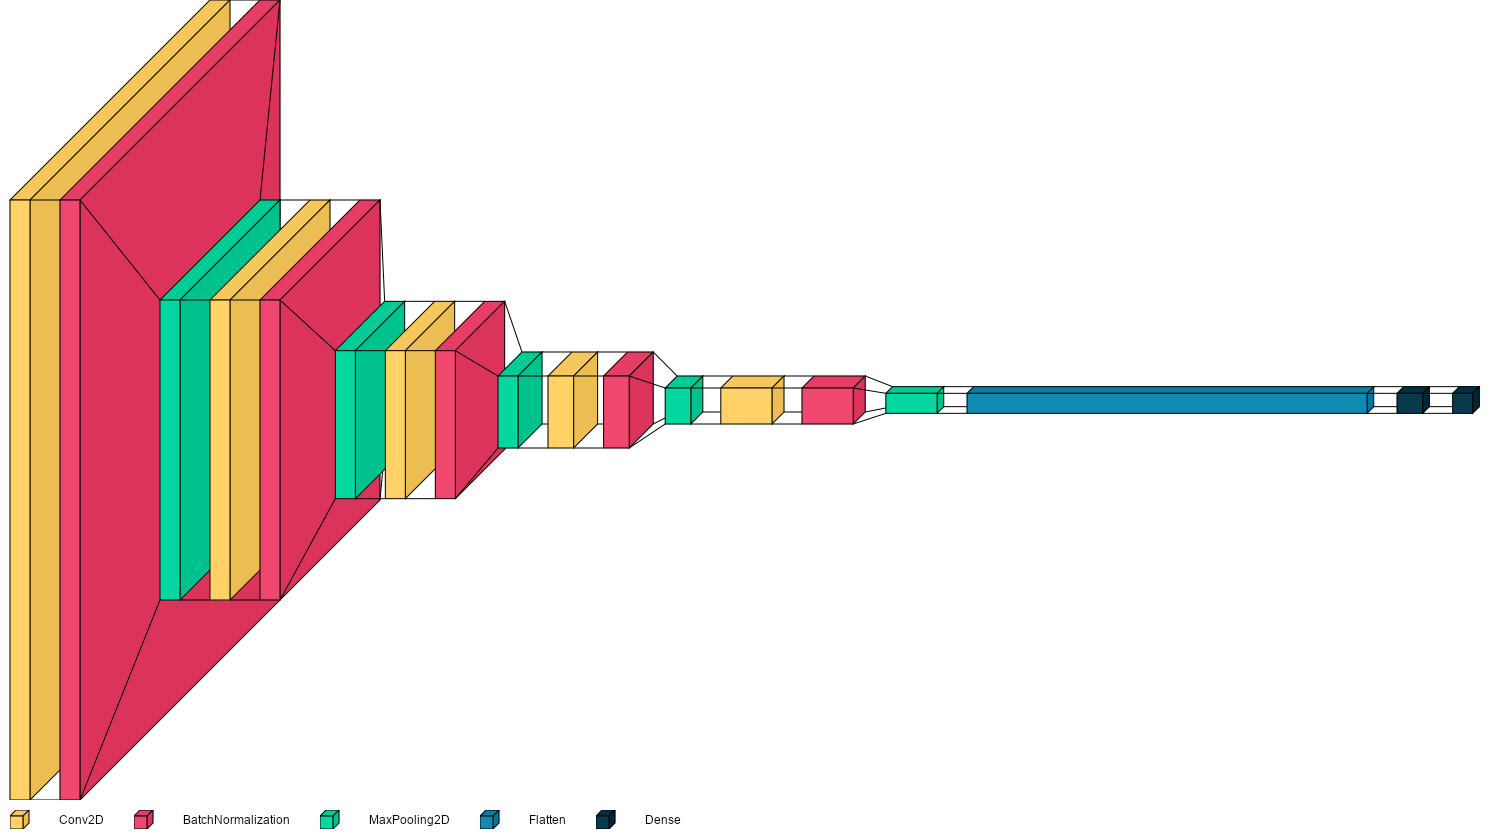

In [112]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3, 3),
                                 input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


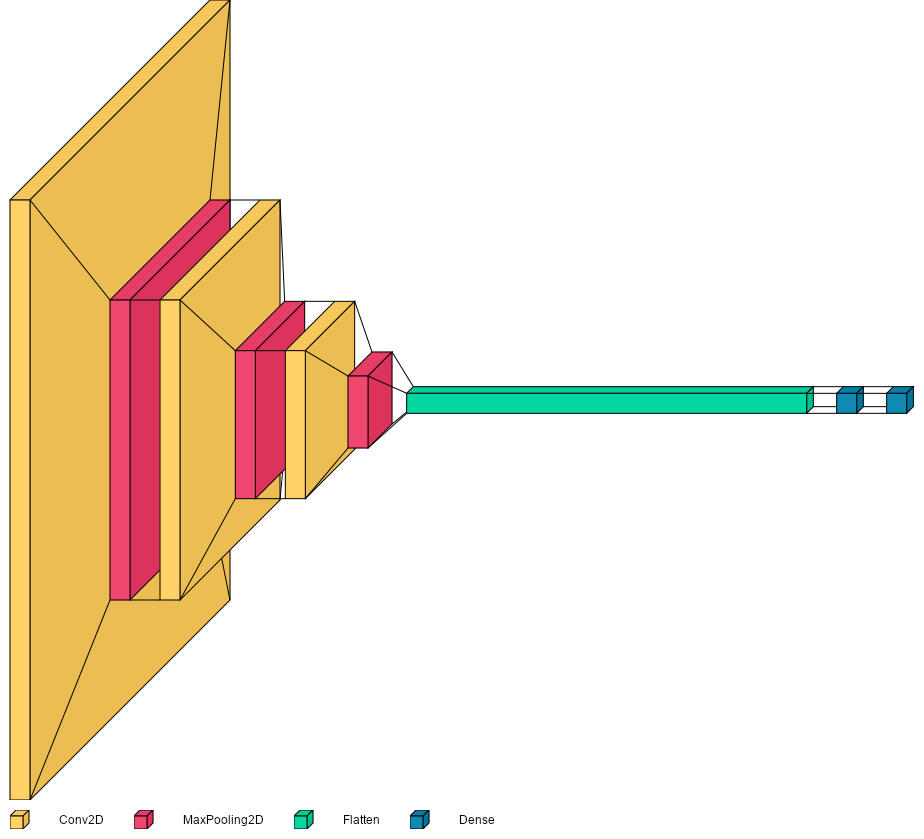

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


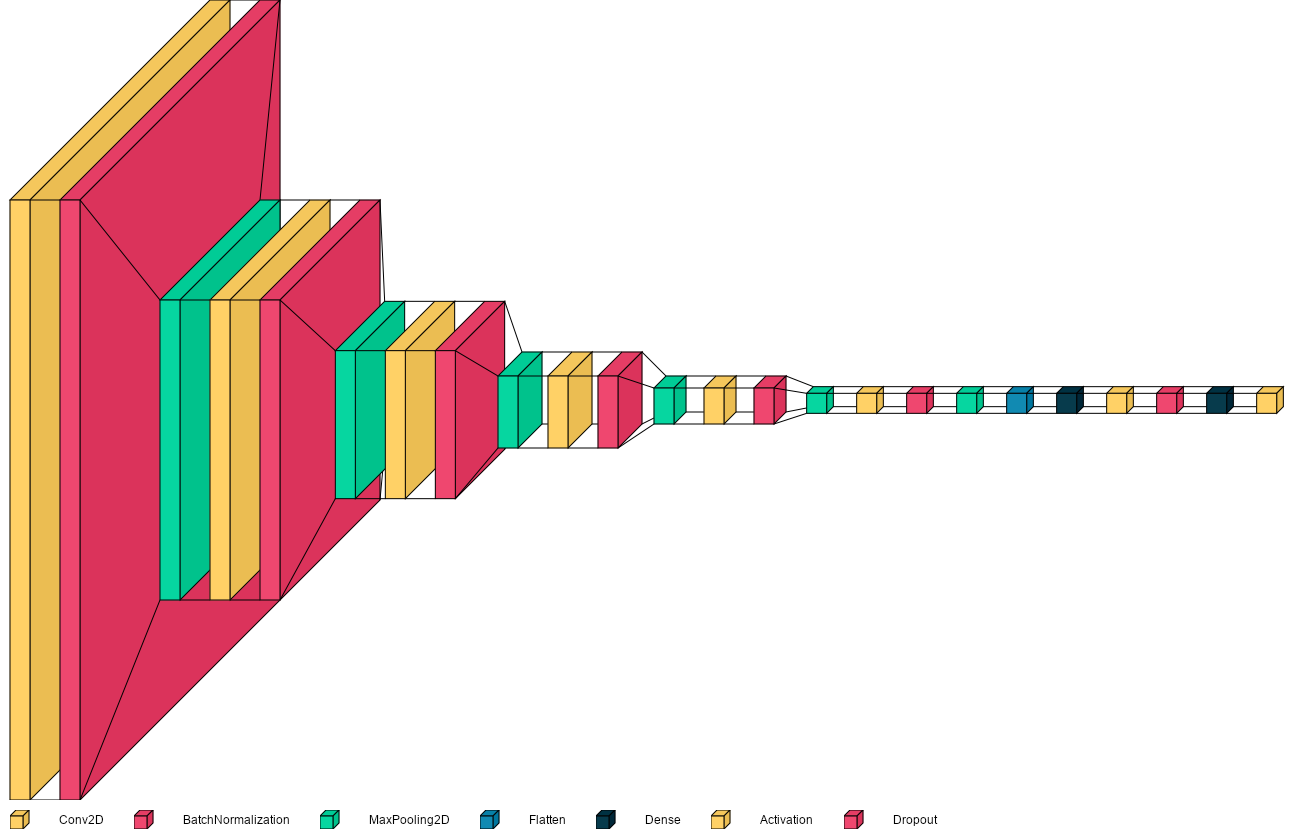

In [114]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
          input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(
    3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.Dropout(0.5)) #v1
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Activation('softmax'))

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


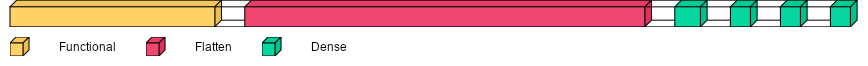

In [115]:
resnet_model = ResNet50V2(
     weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet_model.layers:
        layer.trainable = False

model = tf.keras.Sequential([
        resnet_model,
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, spacing=30)


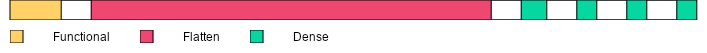

In [31]:
resnet_model = VGG16(
     weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet_model.layers:
        layer.trainable = False

model = tf.keras.Sequential([
        resnet_model,
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False, spacing=30)


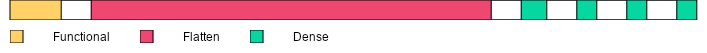

In [34]:
resnet_model = VGG19(
     weights='imagenet', include_top=False, input_shape=input_shape)

for layer in resnet_model.layers:
        layer.trainable = False

model = tf.keras.Sequential([
        resnet_model,
        tf.keras.layers.Flatten(),
        #tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Dense(256, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(4, activation='softmax')
    ])

font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font, draw_volume=False, spacing=30)

In [62]:
frente_umida_count=0
fundo_intermediaria_count=0
meio_seca_count=0
casca_amendoim_count=0

In [63]:
# materiais e métodos
# contando a quantidade de imagens de cada classe

def count_classes(directory_path):
    global frente_umida_count, fundo_intermediaria_count, meio_seca_count, casca_amendoim_count

    if os.path.exists(directory_path):
        for filename in os.listdir(directory_path):
            if os.path.isfile(os.path.join(directory_path, filename)):
                name = filename.split(" ")[0]
                if name == 'Frente+Umida':
                    frente_umida_count = frente_umida_count + 1
                elif name == 'Fundo+Intermediaria':
                    fundo_intermediaria_count+=1
                elif name == 'Meio+Seca':
                    meio_seca_count+=1
                elif name == 'camendoim6sCenL1':
                    casca_amendoim_count+=1

In [64]:
# 1. dataset3amostras
count_classes('dataset3amostras')

# 2. dataset4amostrasFrente+Umida
count_classes('dataset4amostrasFrente+Umida')

# 3. dataset5amostrasMeio+Seca
count_classes('dataset5amostrasMeio+Seca')

# 4. dataset6amostrasFundo+Intermediaria
count_classes('dataset6amostrasFundo+Intermediaria')

# 5. dataset7CascaAmendoim6semCentroL1
count_classes('dataset7CascaAmendoim6semCentroL1')

In [65]:
print("frente_umida_count:", frente_umida_count)
print("fundo_intermediaria_count:", fundo_intermediaria_count)
print("meio_seca_count:", meio_seca_count)
print("casca_amendoim_count:", casca_amendoim_count)

frente_umida_count: 68
fundo_intermediaria_count: 109
meio_seca_count: 121
casca_amendoim_count: 107


In [94]:
df = {'classes':['Frente úmida (maravalha)', 'Fundo intermediária (maravalha)', 'Meio seca (maravalha)', 'Casca de amendoim (casca de amendoim)'], 
      'count':[frente_umida_count, fundo_intermediaria_count, meio_seca_count, casca_amendoim_count]}

In [95]:
df = pd.DataFrame.from_dict(df)

In [96]:
df['porcentagem'] = round(df['count'] / df['count'].sum() * 100, 1)

In [97]:
df

classes  count  porcentagem
0               Frente úmida (maravalha)     68         16.8
1        Fundo intermediária (maravalha)    109         26.9
2                  Meio seca (maravalha)    121         29.9
3  Casca de amendoim (casca de amendoim)    107         26.4

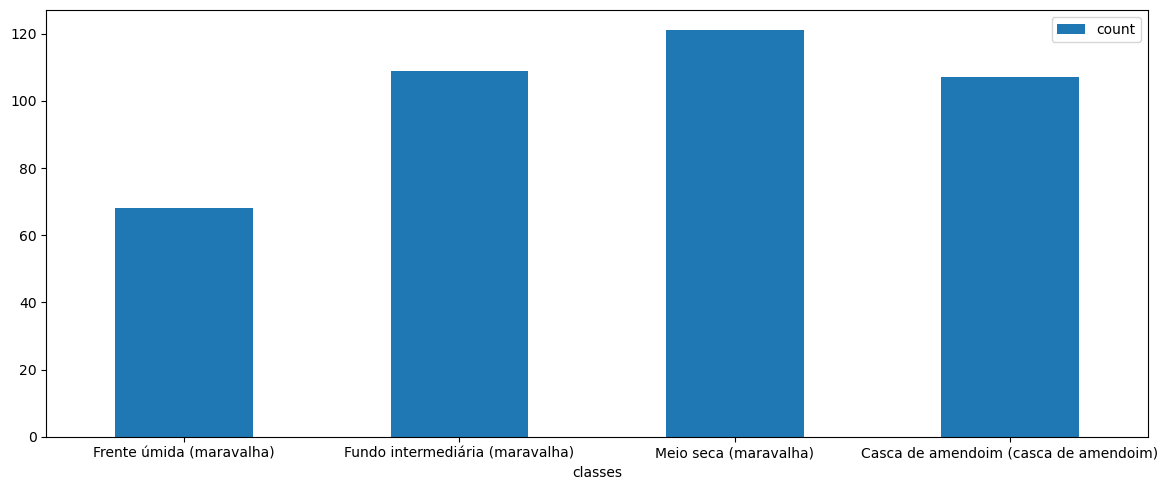

In [98]:
fig, ax = plt.subplots(figsize=(12, 5)) 
df.plot.bar(x='classes', y='count', rot=0, ax=ax)
plt.tight_layout() 
plt.show()

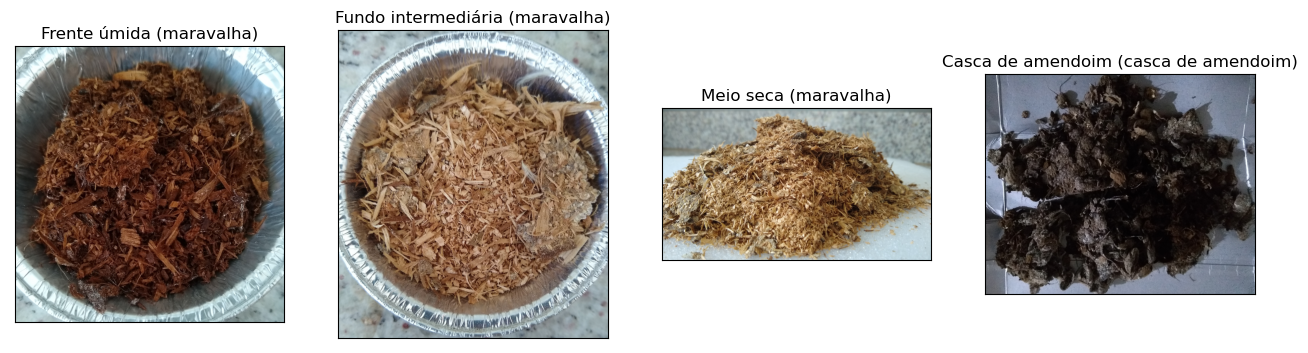

In [116]:
# amostras de frente úmida
plt.figure(figsize=(16, 16))

# frente úmida
plt.subplot(1, 4, 1)
plt.imshow(plt.imread('dataset3amostras/Frente+Umida (1).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
plt.xticks([])
plt.yticks([])
    
# fundo intermediária
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('dataset3amostras/Fundo+Intermediaria (3).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Fundo intermediária (maravalha)')
plt.xticks([])
plt.yticks([])

# meio seca
plt.subplot(1, 4, 3)
plt.imshow(plt.imread('dataset5amostrasMeio+Seca/Meio+Seca (19).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Meio seca (maravalha)')
plt.xticks([])
plt.yticks([])

# casca amendoim
plt.subplot(1, 4, 4)
plt.imshow(plt.imread('dataset7CascaAmendoim6semCentroL1/camendoim6sCenL1 (1).jpg'), 'gray', vmin=0, vmax=255)
plt.title('Casca de amendoim (casca de amendoim)')
plt.xticks([])
plt.yticks([])

plt.savefig('amostras.png', bbox_inches='tight')


In [120]:
def grid(path):

    img = plt.imread(path)

    y_factor = img.shape[0]//3
    x_factor = img.shape[1]//3

    plt.figure(figsize=(8, 8))
    plt.subplot(3, 3, 1)
    # top right
    plt.imshow(img[0:y_factor, 0:x_factor], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
        
    plt.subplot(3, 3, 2)
    # top middle
    plt.imshow(img[0:y_factor, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
        
    plt.subplot(3, 3, 3)
    # top left
    plt.imshow(img[0:y_factor, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, 4)
    # middle right
    plt.imshow(img[y_factor:y_factor*2,  0:x_factor], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, 5)
    # middle middle
    plt.imshow(img[y_factor:y_factor*2, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, 6)
    # middle left
    plt.imshow(img[y_factor:y_factor*2, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, 7)
    # bottom left
    plt.imshow(img[y_factor*2:y_factor*3,  0:x_factor], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, 8)
    # bottom middle
    plt.imshow(img[y_factor*2:y_factor*3, x_factor:x_factor*2], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])

    plt.subplot(3, 3, 9)
    # bottom right
    plt.imshow(img[y_factor*2:y_factor*3, x_factor*2:x_factor*3], 'gray', vmin=0, vmax=255)
    plt.xticks([])
    plt.yticks([])
    
    plt.savefig(path.split("/")[-1].split('.')[0]+".jpg", bbox_inches='tight')

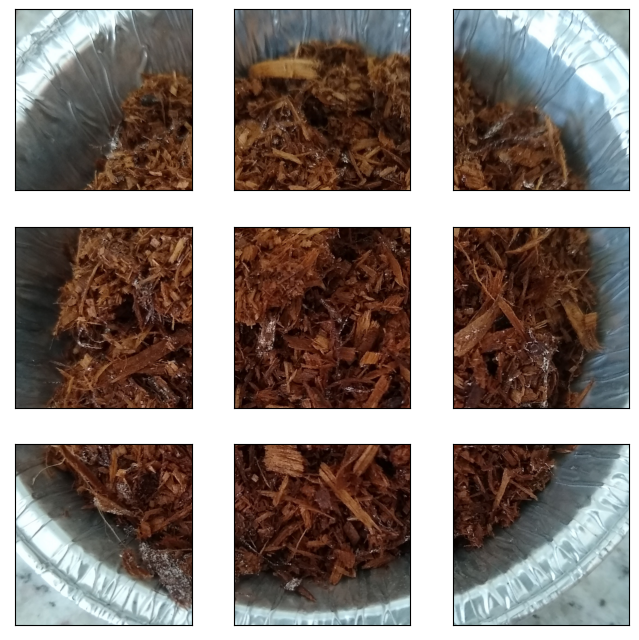

In [121]:
grid('dataset3amostras/Frente+Umida (1).jpg')

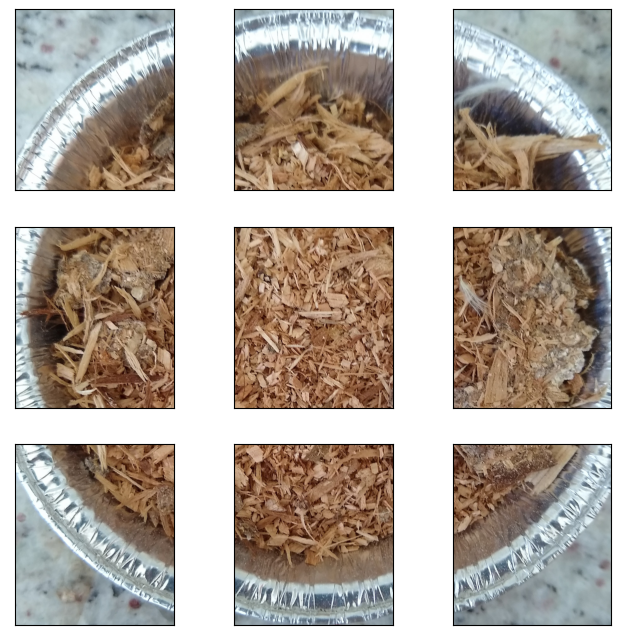

In [122]:
grid('dataset3amostras/Fundo+Intermediaria (3).jpg')

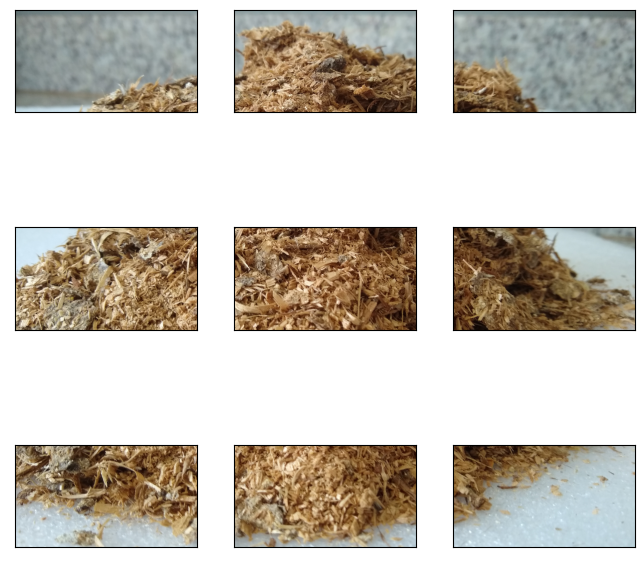

In [123]:
grid('dataset5amostrasMeio+Seca/Meio+Seca (19).jpg')

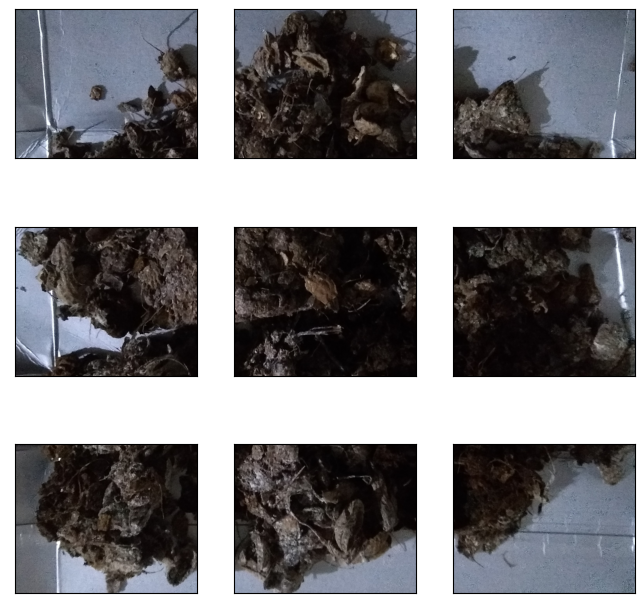

In [124]:
grid('dataset7CascaAmendoim6semCentroL1/camendoim6sCenL1 (1).jpg')

([], [])

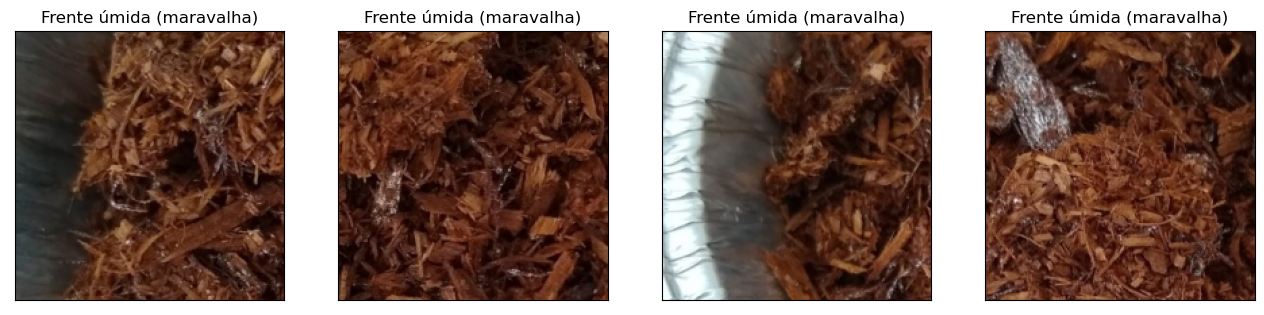

In [133]:
# amostras de frente úmida após resize
plt.figure(figsize=(16, 16))

plt.subplot(1, 4, 1)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (1)_middle_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
plt.xticks([])
plt.yticks([])
    
plt.subplot(1, 4, 2)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (1)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 3)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (2)_middle_left.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 4, 4)
plt.imshow(plt.imread('camas_tiles_train/Frente+Umida/Frente+Umida (2)_middle_middle.jpg'), 'gray', vmin=0, vmax=255)
plt.title('Frente úmida (maravalha)')
plt.xticks([])
plt.yticks([])
